In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Lesson 3 Challenge starts at "HERE"

### Let's build a Naïve-Bayes model using a sample of Yelp reviews.

In [3]:
# Read yelp reviews txt file
reviews = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
reviews.columns = ['review', 'favorable']
reviews.head()

,review,favorable
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### I am going to see if certain good words and bad words are reliable predictors of reviews. I am going to start by defining two different dictionaries to analyze the reviews in the dataset.

In [4]:
# Build features by looking for reviews that contain certain words

# Words indicative of each review category
good_words = ['loved', 'was good', 'great', 'recommended', 'beautiful', 'friendly', 'delight', 'amazing', 'awesome', 'excellent', 'will return']
bad_words = ['not good', 'nasty', 'angry', 'overpriced', 'disgusted', 'slow', 'sick', 'suck', 'bad', 'disappointing', 'gross', 'rude']

# Function to select review to be favorable or unfavorable
def feature_selector(df, dict):
    
    for word in dict:
        df[str(word)] = (df.review.str.contains(' ' + str(word) + ' ', case=False))
    
    return

# Run function with each dictionary
feature_selector(reviews, good_words)
feature_selector(reviews, bad_words)


#### Let's modify the 'favorable' column into Boolean from numeric values (0 or 1).

In [5]:
# Change the 'favorable' column into Boolean
reviews['favorable'] = (reviews['favorable'] == 1)
reviews

,review,favorable,loved,was good,great,recommended,beautiful,friendly,delight,amazing,...,angry,overpriced,disgusted,slow,sick,suck,bad,disappointing,gross,rude
0,Wow... Loved this place.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,The fries were great too.,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,A great touch.,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


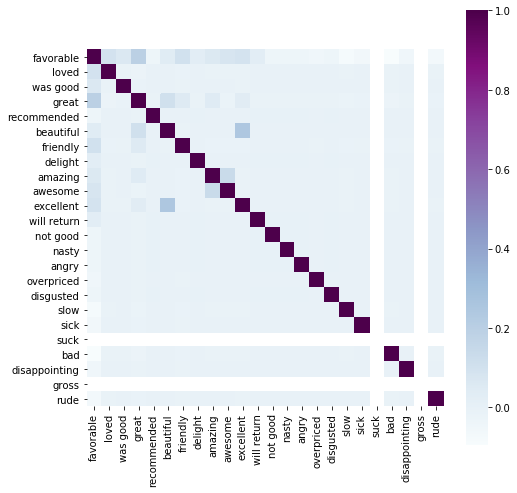

In [6]:
# Plot heatmap of correlation coefficients between features
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(reviews.corr(), cmap="BuPu", square=True)

#### The heatmap shows each feature independence. 'Gross'-'sick', and 'excelllent'-'beautiful' pairs show higher than average correlation. 

In [16]:
# We need to specify the outcomes(target) and input(data)
target_yelp = reviews['favorable']
data_yelp = reviews[good_words + bad_words]


In [18]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred_yelp = bnb.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred_yelp).sum()
))

Number of mislabeled points out of a total 1000 points : 405


#### This model was incorrect 383 times, meaning a model accuracy of 62.7%  Now I want to apply the same model to another survey to see how it translates, if at all. 

In [9]:
# Let's first read the amazon dataset
imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None)

# Name columns
imdb.columns = ['review', 'favorable']

# Change favorable column into Boolean
imdb['favorable'] = (imdb['favorable'] == 1)

imdb.head()

,review,favorable
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


In [10]:
# Run function with each dictionary
feature_selector(imdb, good_words)
feature_selector(imdb, bad_words)

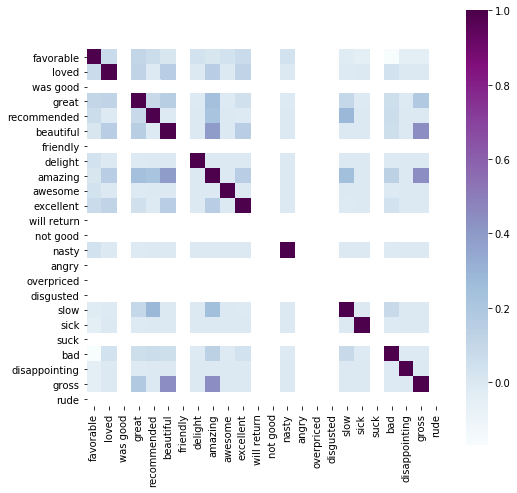

In [11]:
# Plot heatmap of correlation coefficients between features
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(imdb.corr(), cmap="BuPu", square=True)

#### This doesn't look too promising as there are several words that don't appear in the dataset.

In [19]:
# We need to specify the outcomes(target) and input(data)
target_imdb = imdb['favorable']
data_imdb = imdb[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_imdb, target_imdb)

# Classify, storing the result in a new variable.
y_pred_imdb = bnb.predict(data_imdb)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_imdb.shape[0],
    (target_imdb != y_pred_imdb).sum()
))

Number of mislabeled points out of a total 748 points : 317


#### We got 332 out of 748 wrong, so the accuracy is only 55.6%

#### Let's trying adding a few more words to see if we can improve this figure and check back to see if it help the Yelp dataset.

In [20]:
good_words.extend(['hilarious', 'enjoyed', 'terrific', 'fresh', '10/10', 'two thumbs up'])
bad_words.extend(['aimless', 'lost', 'poor','wasted', 'low budget', 'predictable', 'lazy'])

####  First IMDB:

In [22]:
feature_selector(imdb, good_words)
feature_selector(imdb, bad_words)

# We need to specify the outcomes(target) and input(data)
target_imdb = imdb['favorable']
data_imdb = imdb[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_imdb, target_imdb)

# Classify, storing the result in a new variable.
y_pred_imdb = bnb.predict(data_imdb)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_imdb.shape[0],
    (target_imdb != y_pred_imdb).sum()
))

Number of mislabeled points out of a total 748 points : 317


####  Added words were marginally better at 58.4%

####  Let's try it on Yelp:

In [23]:
feature_selector(reviews, good_words)
feature_selector(reviews, bad_words)

# We need to specify the outcomes(target) and input(data)
target_yelp = reviews['favorable']
data_yelp = reviews[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred_yelp = bnb.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred_yelp).sum()
))

Number of mislabeled points out of a total 1000 points : 405


#### Oops. That actually made it worse, decreasing the accuracy to 59.5% from 62.7% The deltas for the two datasets after adding to the dictionary using the IMDB reviews were a decrease of 2.8% for Yelp and an increase of 3.2% for IMDB.

# HERE 

### Let's start by creating the confusion matrix.

In [ ]:
from sklearn.model_selection import cross_val_score

# For Yelp Model
cross_val_score(bnb, data, target, cv=10)